In [1]:
import src.data_cleaning as dc
import src.utils.plotting as pl
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, fixed


Zanim rozpoczniemy analize naszego zbioru załadujmy dane i wyczyścmy je korzystając z pliku data_cleaning

In [2]:
df_loaded = pd.read_json('cocktail_dataset.json')
df = dc.clean_data(df_loaded)

Na początek zwizualizujmy dane odnośnie koktajli - jakie są kategorie koktajli, jakich szklanek się używa oraz ile używa się składników

In [3]:
ingredient_counts = df['ingredient_count'].value_counts().sort_index()
category_counts = df_loaded['category'].value_counts()
glass_counts = df_loaded['glass'].value_counts()

interact(pl.plot_1, plot_type=['Ilość składników w drinkach', 'Ilość drinków w kategoriach', 'Ilość drinków w rodzajach szklanek'],
          ingredient_counts=fixed(ingredient_counts), category_counts=fixed(category_counts), glass_counts=fixed(glass_counts))

interactive(children=(Dropdown(description='plot_type', options=('Ilość składników w drinkach', 'Ilość drinków…

<function src.utils.plotting.plot_1(plot_type, ingredient_counts, category_counts, glass_counts)>

Zobaczmy więc jak algorytmy klastrujące rozdzielają nasze koktajle do grup oraz oceńmy jak dobrze dany algorytm rozdziela koktajle na grupy. Zrobimy to używając 3 metryk: <br>
Silhoutte Score powie nam jak dobrze obiekty pasują do swoich klastrów (skala - im wyżej tym lepiej) <br>
Davies-Bouldin Index powie nam jak dobrze klastry są od siebie odseparowane (skala - im mniej tym lepiej) <br>
Calinski-Harabasz Index powie nam jak ma się wariancja wewnatrz klastrów do wariancji między klastrami (skala - im wyżej tym lepiej) <br>
Wykres jest interaktywny więc można zapoznać się z różnymi wynikami. <br>
Aby zróżnicować wyniki zalecane jest usunięcie argumentu random_state podczas definiowania algorytmu.

In [ ]:
algorithm_widget = widgets.Dropdown(
    options=['KMeans', 'Spectral Clustering'],
    value='KMeans',
    description='Algorithm:',
)

n_clusters_widget = widgets.IntSlider(
    value=5,
    min=2,
    max=15,
    step=1,
    description='Klastry'
)

scaler_widget = widgets.Checkbox(
    value=True,
    description='Standaryzowanie Danych',
)

interact(pl.plot_2, n_clusters=n_clusters_widget, algorithm=algorithm_widget, scaler=scaler_widget, df=fixed(df))

# interesting note - the data seems much more readable when it is not standarized and spectral clustering seems to work better then

interactive(children=(IntSlider(value=5, description='Klastry', max=15, min=2), Dropdown(description='Algorith…

<function src.utils.plotting.plot_2(n_clusters, algorithm, scaler, df)>

Na koniec zobaczmy, jak grupowane są nasze dane na bazie najbardziej optymalnego podzialu algorytmu k-means

Dla najlepszej ilości klastrów - 2, wyniki: 
Silhouette : 0.20739333894058953
Davies Bouldin : 2.3677384296016175
Calinski Harabasz : 15.063607692032395


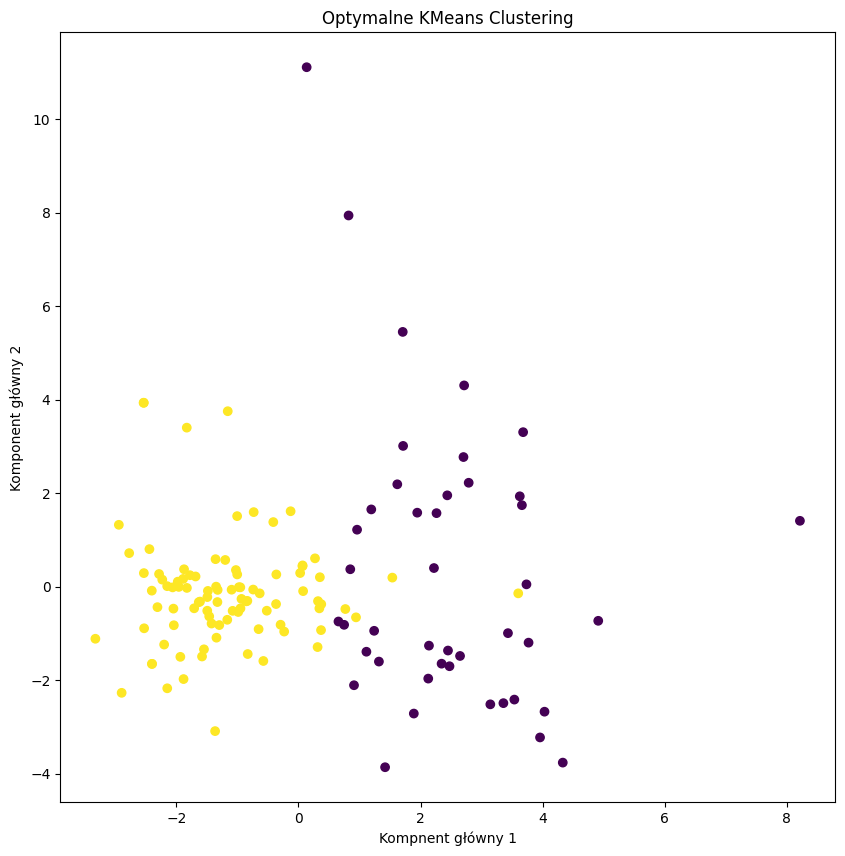

In [5]:
pl.plot_3(df)


In [ ]:
interact(pl.plot_4, plot_type=['Rozkład grup składników w klastrach', 'Rozkład koktajli w klastrach', 'Rozkład szklanek w klastrach'], df=fixed(df), df_loaded=fixed(df_loaded))

interactive(children=(Dropdown(description='plot_type', options=('Rozkład grup składników w klastrach', 'Rozkł…

<function src.utils.plotting.plot_4(plot_type, df, df_loaded)>